.

# Examine MRI volumes and segmentation masks

This notebook provides a small set of helper cells to load NIfTI (or other) volumes and segmentation masks and to quickly inspect slice overlays.

Usage: update the `scan_path` and `mask_path` variables in the 
 cell to point to a sample case from your dataset (for example a folder under `training_data1_v2/`).

In [23]:
# Standard imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
try:
    import nibabel as nib
except Exception as e:
    print("nibabel not installed. Install with: pip install nibabel")

%matplotlib inline

In [ ]:
# Update these paths to point to a sample case in your workspace
# Example: scan_path could be training_data1_v2/BraTS-GLI-00005-100/ (and you'd pick the T1/T2/flair volume)
scan_path = '/home/gobi/glioma/training_data1_v2/BraTS-GLI-00005-100/BraTS-GLI-00005-100-t1c.nii.gz'  # <-- adjust
mask_path = '/home/gobi/glioma/training_data1_v2/BraTS-GLI-00005-100/BraTS-GLI-00005-100-seg.nii.gz'  # <-- adjust to your seg file

# Set the notebook's current working directory to the repository/project root
# (here we use the current working directory as the "root folder")
root_folder = os.path.abspath('..')
os.chdir(root_folder)
print(f"Current root folder set to: {root_folder}")

def load_nifti(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f'File not found: {path}')
    return nib.load(path).get_fdata()

# Example safe load (will raise if file not found)
scan = load_nifti(scan_path)
mask = load_nifti(mask_path)

Current root folder set to: /


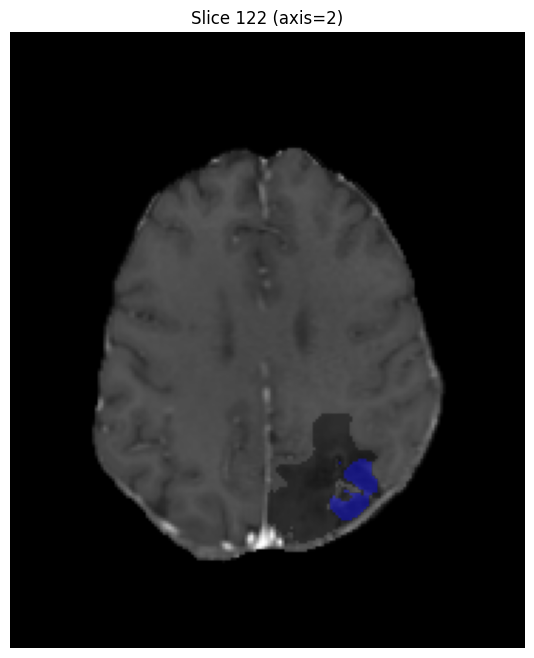

In [33]:
def show_slice_with_mask(image, mask, slice_index=None, axis=2, cmap='gray'):
    # Select slice index default to middle
    if slice_index is None:
        slice_index = image.shape[axis] // 2
    # Extract 2D slice depending on axis
    if axis == 0:
        img2d = image[slice_index, :, :]
        msk2d = mask[slice_index, :, :]
    elif axis == 1:
        img2d = image[:, slice_index, :]
        msk2d = mask[:, slice_index, :]
    else:
        img2d = image[:, :, slice_index]
        msk2d = mask[:, :, slice_index]

    plt.figure(figsize=(8, 8))
    plt.imshow(img2d.T, cmap=cmap, origin='lower')
    # overlay mask with transparency
    cmap_mask = ListedColormap(['black', 'red', 'green', 'blue'])
    plt.imshow(np.ma.masked_where(msk2d.T == 0, msk2d.T), cmap=cmap_mask, alpha=0.4, origin='lower')
    plt.axis('off')
    plt.title(f'Slice {slice_index} (axis={axis})')
    plt.show()

show_slice_with_mask(scan, mask, slice_index=122, axis=2)

Notes:
- If your segmentations use label values >3, update the `ListedColormap` to include more colors.
- If your data files are organized differently (separate modalities), load the desired modality file into `scan` before calling the visualization function.

In [26]:
# Check unique values in the mask
print("Unique values in the mask:", np.unique(mask))

Unique values in the mask: [0. 2. 4.]


In [29]:
# Check the dimensions of the scan and mask
print("Scan shape:", scan.shape)
print("Mask shape:", mask.shape)

Scan shape: (182, 218, 182)
Mask shape: (182, 218, 182)


In [31]:
# Check where the mask starts and ends in the axial-axis
print("Mask non-zero slices along axis 2 (axial):", np.where(np.any(mask, axis=(0, 1)))[0])

Mask non-zero slices along axis 2 (axial): [102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150]


In [36]:
# Find the mask in the folder which has also label value 1, search in Every sub folder of parent folder '/home/gobi/glioma/training_data1_v2/' With the extension -seg.nii.gz 
def find_mask_with_label(folder, label_value=1):
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('-seg.nii.gz'):
                mask = load_nifti(os.path.join(root, file))
                if label_value in np.unique(mask):
                    return os.path.join(root, file)
    return None

root_folder = '/home/gobi/glioma/training_data1_v2/'
mask_file = find_mask_with_label(root_folder, label_value=1)
print(f"Mask file containing label {1}: {mask_file}")


Mask file containing label 1: /home/gobi/glioma/training_data1_v2/BraTS-GLI-02978-101/BraTS-GLI-02978-101-seg.nii.gz
